Machine Learning Practice

#1 Data Set Preparation

In [13]:
import pandas as pd

In [14]:
df = pd.read_table('train_preprocess.tsv.txt', names=['text', 'label'])
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [15]:
#checking  the data
df.label.value_counts()

label
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

In [16]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


#2 Text Normalization

In [17]:
#Tokenization & Text Cleansing
#Sentence Tokenization : mengubah paragraf ke kalimat
#import nltk tokenize 
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Ahmad Fadlan
[nltk_data]     Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
#create function for data cleansing
#cleaned data input on new column

def cleansing(text):
    clean_text = text.lower()
    clean_text = re.sub(r'[^\w\s]', '', clean_text) 
    return clean_text

df['clean_text'] = df['text'].apply(cleansing)
df.head

<bound method NDFrame.head of                                                     text     label  \
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2      lokasi strategis di jalan sumatera bandung . t...  positive   
3      betapa bahagia nya diri ini saat unboxing pake...  positive   
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative   
...                                                  ...       ...   
10995                                       tidak kecewa  positive   
10996  enak rasa masakan nya apalagi kepiting yang me...  positive   
10997        hormati partai-partai yang telah berkoalisi   neutral   
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative   
10999  meskipun sering belanja ke yogya di riau junct...  positive   

                                              clean_text  
0      warung ini dimiliki oleh pengusaha pabrik tahu...  
1      moho

In [21]:
#group and classify the data based on the sentiment
#separate cleaned data, and label from separate column
neg = df.loc[df['label'] == 'negative'].clean_text.tolist()
neu = df.loc[df['label'] == 'neutral'].clean_text.tolist()
pos = df.loc[df['label'] == 'positive'].clean_text.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

In [22]:
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print('Pos: %s, Neu: %s, Neg: %s' % (len(pos), len(neu), len(neg)))
print('Total data: %s' % len(total_data))

Pos: 6416, Neu: 1148, Neg: 3436
Total data: 11000


#3 Feature Extraction

In [23]:
import tensorflow

In [24]:
#Feature extraction
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

In [25]:
max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('tokenizer.pickle has created!')

tokenizer.pickle has created!


In [26]:
X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index) 
maxlean = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle' , 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('x_pad_sequences.pickle has created')

x_pad_sequences.pickle has created


In [27]:
# Input label data to Y variable
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('y_labels.pickle has created!')

y_labels.pickle has created!


In [28]:
# Split the data to 80% for training, 20% for testing
from sklearn.model_selection import train_test_split
file = open('x_pad_sequences.pickle' , 'rb')
X = pickle.load(file)
file.close()

file = open('y_labels.pickle', 'rb')   
Y = pickle.load(file)
file.close()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#4 Model Training


In [29]:
#import numpy and framework
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard 
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [30]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test), verbose=1, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 91, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10042435 (38.31 MB)
Trainable params: 10042435 (38.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
880/880 [==============================] - 181s 199ms/step - loss: 0.4499 - accuracy: 0.8255 - val_loss: 0.3409 - val_accuracy: 0.8664
Epoch 2/10
880/880 [==============================] - 163s 185ms/step - loss: 0.1978 - accuracy: 0.9290 - val_loss: 0.3600 - va

#5 Evaluation

Using cross validation

In [31]:
from sklearn import metrics

In [32]:
predictions = model.predict(x_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('Testing selesai')
print(matrix_test)

69/69 [==============================] - 3s 27ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       685
           1       0.85      0.79      0.82       233
           2       0.86      0.95      0.90      1282

    accuracy                           0.86      2200
   macro avg       0.86      0.82      0.84      2200
weighted avg       0.86      0.86      0.86      2200



In [33]:
#cross validation

import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
accuracies = []

y = Y

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train = X[data[0]]
    target_train = y[data[0]]

    data_test = X[data[1]]
    target_test = y[data[1]]

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    print(model.summary())

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test), verbose=1, callbacks=[es])

    predictions = model.predict(x_test)
    y_pred = predictions

    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print('Training ke-', iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print('======================================')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print('Rata-rata Accuracy: ', average_accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 91, 100)           10000000  
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10042435 (38.31 MB)
Trainable params: 10042435 (38.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
880/880 [==============================] - 181s 199ms/step - loss: 0.4565 - accuracy: 0.8145 - val_loss: 0.3527 - val_accuracy: 0.8682
Epoch 2/10
880/880 [==============================] - 205s 233ms/step - loss: 0.1922 - accuracy: 0.9295 - val_loss: 0.3759 - 

#6 Model Prediction

In [34]:
model.save('model.h5')
print('model has created!')

c:\Users\Ahmad Fadlan Amin\Platinum_Challenge_Binar\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model has created!


In [35]:
import re
from keras.models import load_model

input_text = """"
simcard indosat inaktiv gara-gara lupa isi pulsa dan kabar nya aktif jika pinda ke pasca bayar , ribet banget
"""

def cleansing(text):
    clean_text = text.lower()
    clean_text = re.sub(r'[^\w\s]', '',clean_text)
    return clean_text

In [36]:
sentiment = ['negative','neutral', 'positive']
text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print('Text: ', text[0])
print('Sentiment: ', sentiment[polarity])

1/1 [==============================] - 1s 820ms/step
Text:  
simcard indosat inaktiv garagara lupa isi pulsa dan kabar nya aktif jika pinda ke pasca bayar  ribet banget

Sentiment:  negative


In [37]:
cat_sent = ['negative','neutral', 'positive']

In [38]:
#Create Function for LSTM
def text_cleansing(text):
    clean_text = text.lower()
    clean_text = re.sub(r'[^\w\s]', '',clean_text)
    return clean_text

def model_lstm(text):
    #Text Cleansing
    clean_text = [text_cleansing(text)]

    predicted = tokenizer.texts_to_sequences(clean_text)
    guess = pad_sequences(predicted, maxlen=X.shape[1])
    prediction = model.predict(guess)
    polarity = np.argmax(prediction[0])
    sentiment = cat_sent[polarity]

    return clean_text, sentiment

In [39]:
#Trial on the sentiment
text_2 = 'simcar!@%$!d indo!%#@^$!^@#sat inaktiv gara-gara lupa isi !%^$@^!% pulsa dan kabar nya aktif jika pinda ke pasca bayar , ribet banget'

model_lstm(text_2)

1/1 [==============================] - 0s 48ms/step


(['simcard indosat inaktiv garagara lupa isi  pulsa dan kabar nya aktif jika pinda ke pasca bayar  ribet banget'],
 'negative')

#7 Visualization and Evaluation

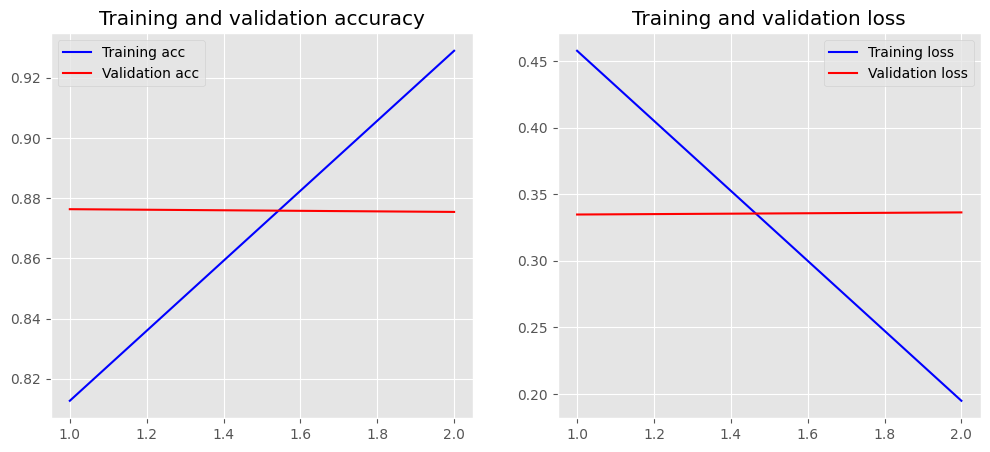

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


%matplotlib inline
plot_history(history)